In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('amazon.csv')

In [66]:
df.category

,category
0,Computers&Accessories|Accessories&Peripherals|...
1,Computers&Accessories|Accessories&Peripherals|...
2,Computers&Accessories|Accessories&Peripherals|...
3,Computers&Accessories|Accessories&Peripherals|...
4,Computers&Accessories|Accessories&Peripherals|...
...,...
1460,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...
1461,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
1462,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe..."
1463,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E..."


In [67]:

df['main_category'] = df['category'].dropna().apply(lambda x: x.split('|')[0].strip())


df['main_category'] = df['main_category'].str.strip().str.lower()


In [68]:
df.main_category.value_counts()

,count
main_category,
electronics,526
computers&accessories,453
home&kitchen,448
officeproducts,31
musicalinstruments,2
homeimprovement,2
toys&games,1
car&motorbike,1
health&personalcare,1


1. What is the average rating for each product category?

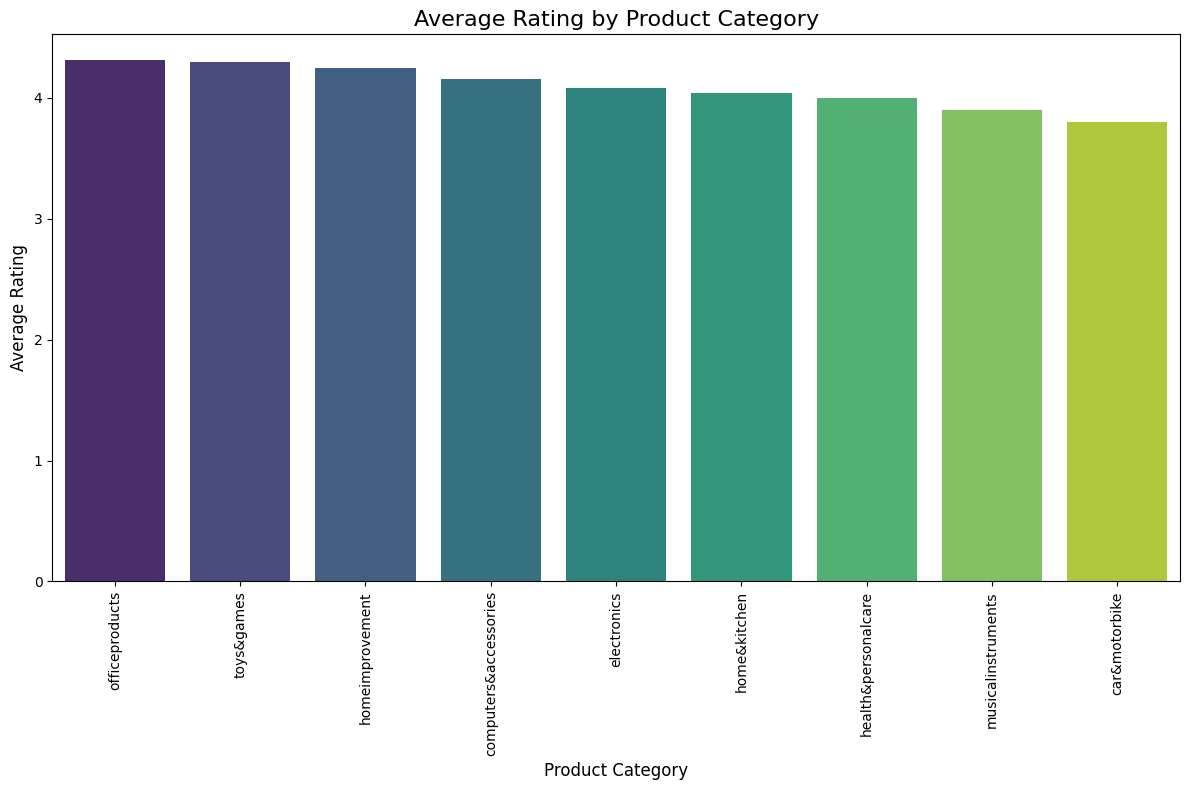

In [69]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

avg_rating = df.groupby('main_category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette="viridis")

plt.title('Average Rating by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()


plt.show()


2. What are the top rating_count products by category?

In [70]:
top_rated = df.sort_values('rating_count', ascending=False).groupby('main_category').head(3)
print(top_rated[['product_name', 'main_category', 'rating_count']])


                                           product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
977   Sennheiser CX 80S in-Ear Wired Headphones with...   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...   
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...   
702   COI Note Pad/Memo Book with Sticky Notes & Cli...   
849   Classmate Pulse 6 Subject Notebook - Unruled, ...   
685   Classmate Soft Cover 6 Subject Spiral Binding ...   
613   Boya ByM1 Auxiliary Omnidirectional Lavalier C...   
982   Gizga Essentials Cable Organiser, Cord Managem...   
1247  Dr Trust Electronic Kitchen Digital Scale Weig...   
800   MAONO AU-400 Lavalier Auxiliary Omnidirectiona... 

In [71]:
df.value_counts('actual_price')

,count
actual_price,
₹999,120
₹499,71
"₹1,999",56
"₹1,499",37
₹399,34
...,...
₹785,1
₹79,1
"₹79,990",1


In [72]:
df.discounted_price.unique()

array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13,999', '₹249',
       '₹13,490', '₹970', '₹279', '₹59', '₹11,499', '₹14,999', '₹179',
       '₹389', '₹599', '₹99', '₹899', '₹32,999', '₹209', '₹19,999',
       '₹999', '₹333', '₹507', '₹309', '₹1,199', '₹799', '₹6,999', '₹230',
       '₹649', '₹15,999', '₹348', '₹32,990', '₹139', '₹263', '₹7,999',
       '₹1,599', '₹26,999', '₹115', '₹10,901', '₹1,434', '₹7,299', '₹325',
       '₹29,999', '₹27,999', '₹30,990', '₹269', '₹24,999', '₹18,990',
       '₹290', '₹345', '₹1,099', '₹719', '₹849', '₹21,999', '₹449',
       '₹37,999', '₹7,390', '₹273.10', '₹15,990', '₹210', '₹1,299',
       '₹347', '₹228', '₹1,499', '₹8,499', '₹20,990', '₹9,999', '₹489',
       '₹23,999', '₹689', '₹1,699', '₹655', '₹749', '₹195', '₹416',
       '₹368', '₹29,990', '₹339', '₹15,490', '₹9,490', '₹637', '₹1,089',
       '₹12,499', '₹1,399', '₹88', '₹57.89', '₹205', '₹949', '₹379',
       '₹8,9

In [73]:
df["discounted_price"]=df["discounted_price"].replace("₹","",regex=True)
df["discounted_price"]=df["discounted_price"].replace(",","",regex=True)

In [74]:
df["discounted_price"]=df.discounted_price.astype(float)

In [75]:
df["actual_price"]=df["actual_price"].replace("₹","",regex=True)
df["actual_price"]=df["actual_price"].replace(",","",regex=True)

In [77]:
df["actual_price"]=df.actual_price.astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

3.  What is the distribution of discounted prices vs. actual prices

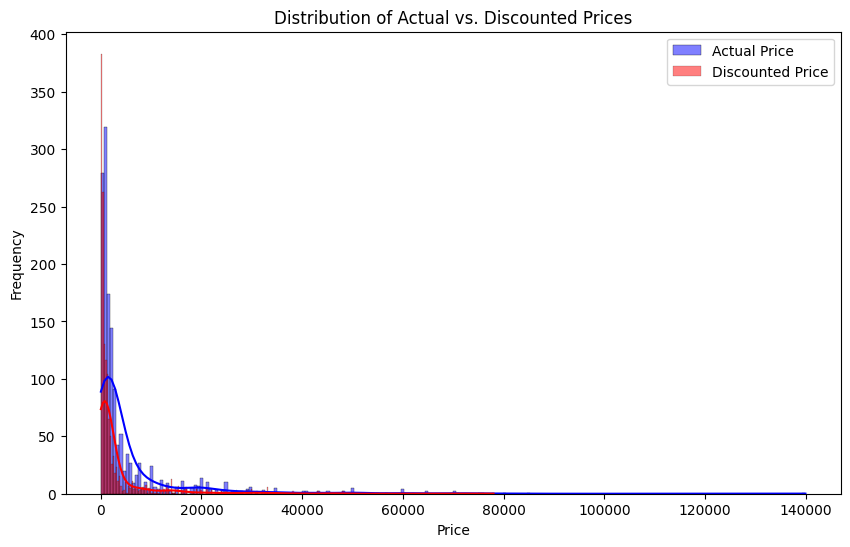

        actual_price  discounted_price
count    1465.000000       1465.000000
mean     5444.990635       3125.310874
std     10874.826864       6944.304394
min        39.000000         39.000000
25%       800.000000        325.000000
50%      1650.000000        799.000000
75%      4295.000000       1999.000000
max    139900.000000      77990.000000


In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_price'], kde=True, label='Actual Price', color='blue', alpha=0.5)
sns.histplot(df['discounted_price'], kde=True, label='Discounted Price', color='red', alpha=0.5)
plt.title('Distribution of Actual vs. Discounted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(df[['actual_price', 'discounted_price']].describe())


4. How does the average discount percentage vary across categories

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [81]:
df.discount_percentage.unique()

array(['64%', '43%', '90%', '53%', '61%', '85%', '65%', '23%', '50%',
       '33%', '55%', '63%', '69%', '60%', '13%', '44%', '38%', '39%',
       '46%', '41%', '70%', '42%', '72%', '25%', '51%', '73%', '0%',
       '80%', '28%', '67%', '58%', '35%', '45%', '62%', '54%', '27%',
       '77%', '56%', '78%', '31%', '86%', '47%', '37%', '75%', '32%',
       '68%', '66%', '22%', '57%', '17%', '52%', '88%', '20%', '59%',
       '40%', '26%', '29%', '83%', '71%', '15%', '76%', '48%', '82%',
       '36%', '89%', '87%', '24%', '34%', '11%', '91%', '7%', '19%',
       '79%', '21%', '81%', '18%', '49%', '30%', '84%', '10%', '6%',
       '14%', '74%', '4%', '5%', '16%', '8%', '2%', '94%', '12%', '3%',
       '9%'], dtype=object)

In [82]:
df["discount_percentage"]=df["discount_percentage"].replace("%","",regex=True)

In [83]:
df.discount_percentage.unique()

array(['64', '43', '90', '53', '61', '85', '65', '23', '50', '33', '55',
       '63', '69', '60', '13', '44', '38', '39', '46', '41', '70', '42',
       '72', '25', '51', '73', '0', '80', '28', '67', '58', '35', '45',
       '62', '54', '27', '77', '56', '78', '31', '86', '47', '37', '75',
       '32', '68', '66', '22', '57', '17', '52', '88', '20', '59', '40',
       '26', '29', '83', '71', '15', '76', '48', '82', '36', '89', '87',
       '24', '34', '11', '91', '7', '19', '79', '21', '81', '18', '49',
       '30', '84', '10', '6', '14', '74', '4', '5', '16', '8', '2', '94',
       '12', '3', '9'], dtype=object)

In [84]:
df["discount_percentage"]=df.discount_percentage.astype(int)

In [85]:
df.discount_percentage.unique()

array([64, 43, 90, 53, 61, 85, 65, 23, 50, 33, 55, 63, 69, 60, 13, 44, 38,
       39, 46, 41, 70, 42, 72, 25, 51, 73,  0, 80, 28, 67, 58, 35, 45, 62,
       54, 27, 77, 56, 78, 31, 86, 47, 37, 75, 32, 68, 66, 22, 57, 17, 52,
       88, 20, 59, 40, 26, 29, 83, 71, 15, 76, 48, 82, 36, 89, 87, 24, 34,
       11, 91,  7, 19, 79, 21, 81, 18, 49, 30, 84, 10,  6, 14, 74,  4,  5,
       16,  8,  2, 94, 12,  3,  9])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

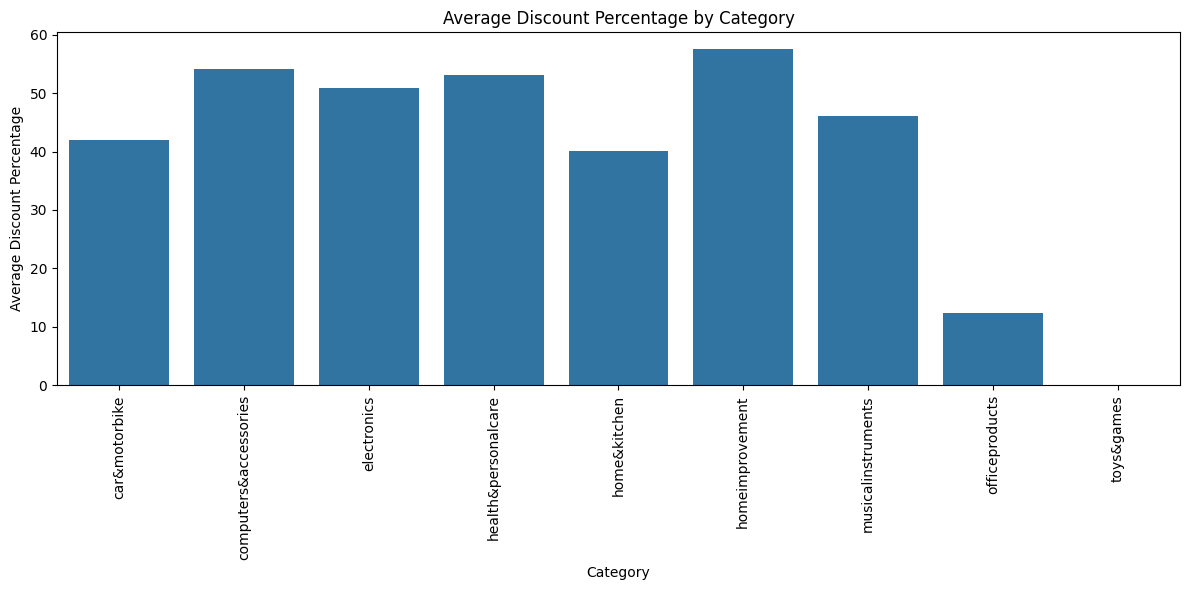

,discount_percentage
main_category,
car&motorbike,42.000000
computers&accessories,54.024283
electronics,50.828897
health&personalcare,53.000000
home&kitchen,40.120536
homeimprovement,57.500000
musicalinstruments,46.000000
officeproducts,12.354839
toys&games,0.000000


In [87]:
average_discount_by_category = df.groupby('main_category')['discount_percentage'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_discount_by_category.index, y=average_discount_by_category.values)
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

average_discount_by_category


5.  What are the most popular product names

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [89]:
df.rating.unique()

array([4.2, 4. , 3.9, 4.1, 4.3, 4.4, 4.5, 3.7, 3.3, 3.6, 3.4, 3.8, 3.5,
       4.6, 3.2, 5. , 4.7, 3. , 2.8, 3.1, 4.8, 2.3, nan, 2. , 2.6, 2.9])

In [90]:
df.rating_count.unique()

array(['24,269', '43,994', '7,928', ..., '468', '8,031', '6,987'],
      dtype=object)

In [91]:
df["rating_count"]=df["rating_count"].replace(",","",regex=True)

In [92]:
df.rating_count.unique()

array(['24269', '43994', '7928', ..., '468', '8031', '6987'], dtype=object)

In [93]:
df["rating_count"]=df["rating_count"].astype(float)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

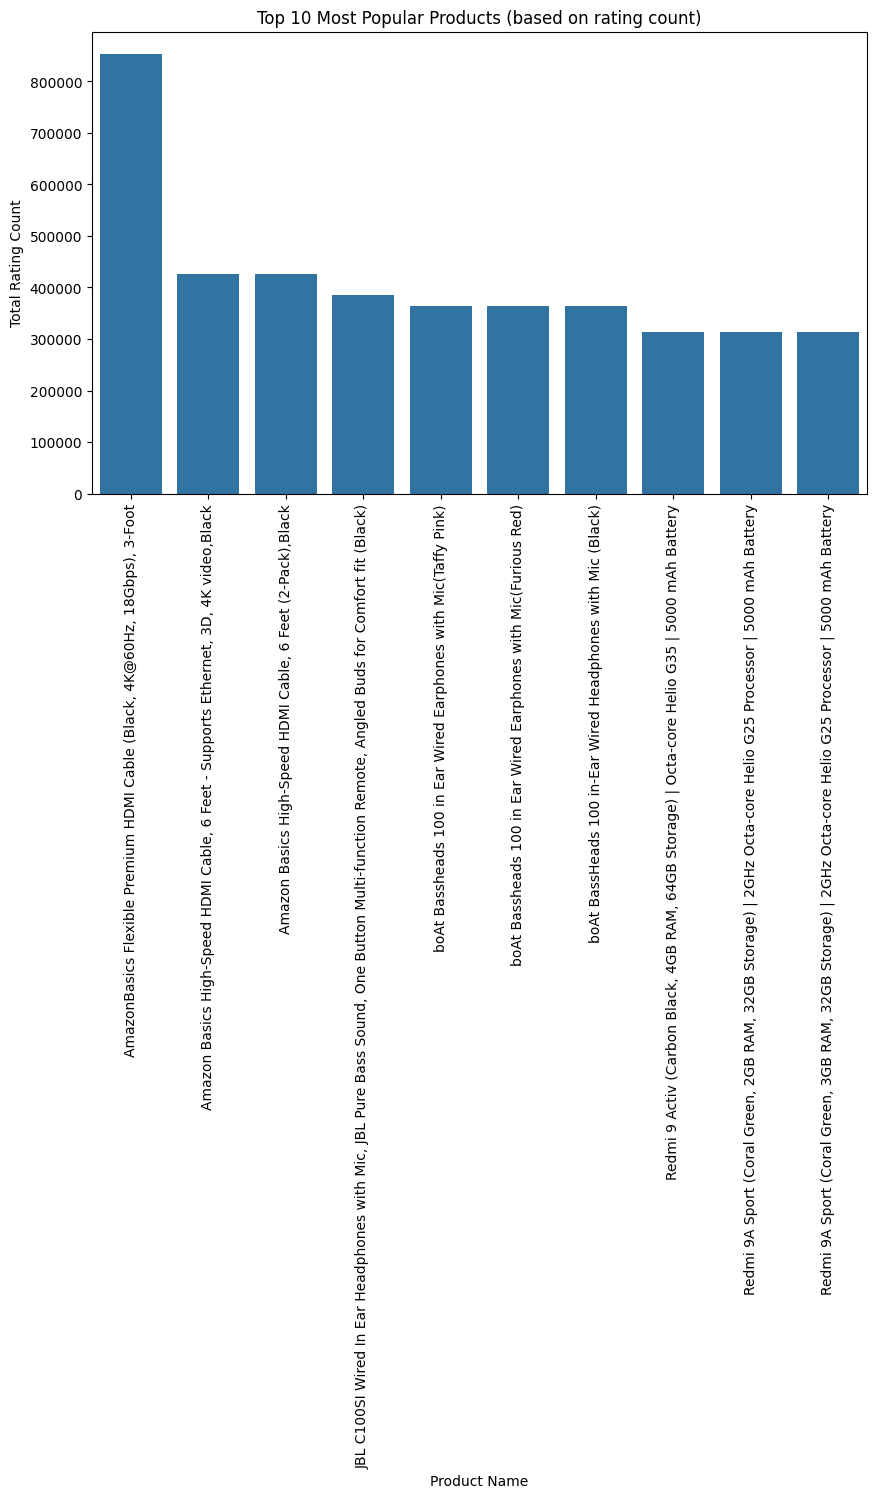

product_name
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot                                                                  853945.0
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black                                                        426973.0
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black                                                                                 426973.0
JBL C100SI Wired In Ear Headphones with Mic, JBL Pure Bass Sound, One Button Multi-function Remote, Angled Buds for Comfort fit (Black)    385177.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink)                                                                             363713.0
boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)                                                                            363713.0
boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)                                        

In [95]:
product_popularity = df.groupby('product_name')['rating_count'].sum().sort_values(ascending=False)

top_products = product_popularity.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Most Popular Products (based on rating count)')
plt.xlabel('Product Name')
plt.ylabel('Total Rating Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(top_products)

6.  What are the most popular product keywords.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

Most popular product keywords:
and: 5260
the: 4335
to: 3777
with: 3086
for: 2554
of: 2099
a: 1876
your: 1867
is: 1480
|: 1431


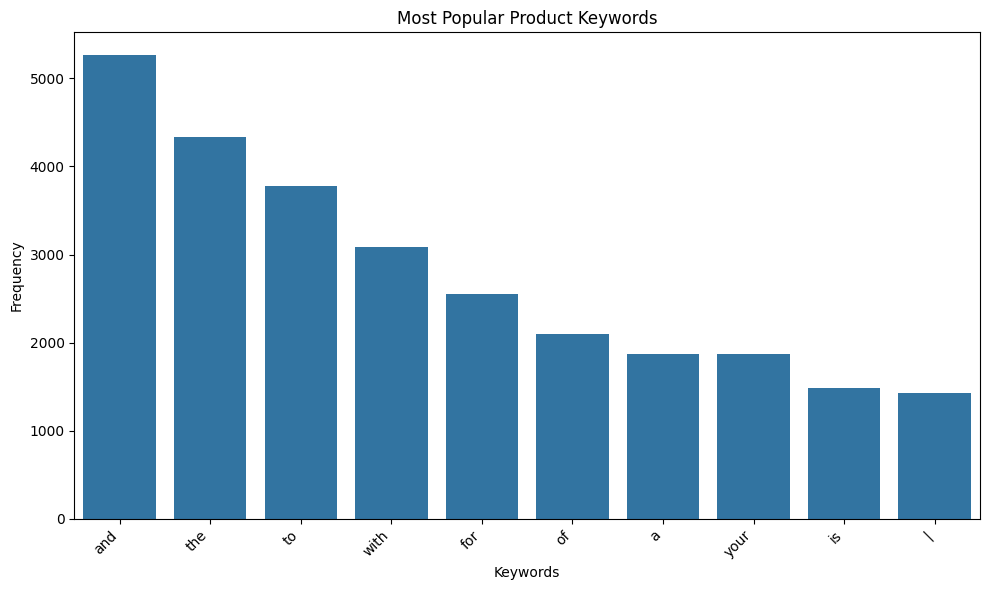

In [97]:
from collections import Counter

all_keywords = []
for keywords in df['about_product'].dropna():
    all_keywords.extend(keywords.lower().split())

keyword_counts = Counter(all_keywords)


most_common_keywords = keyword_counts.most_common(10)

print("Most popular product keywords:")
for keyword, count in most_common_keywords:
    print(f"{keyword}: {count}")

keywords, counts = zip(*most_common_keywords)
plt.figure(figsize=(10, 6))
sns.barplot(x=keywords, y=counts)
plt.title('Most Popular Product Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


7. What are the most popular product reviews

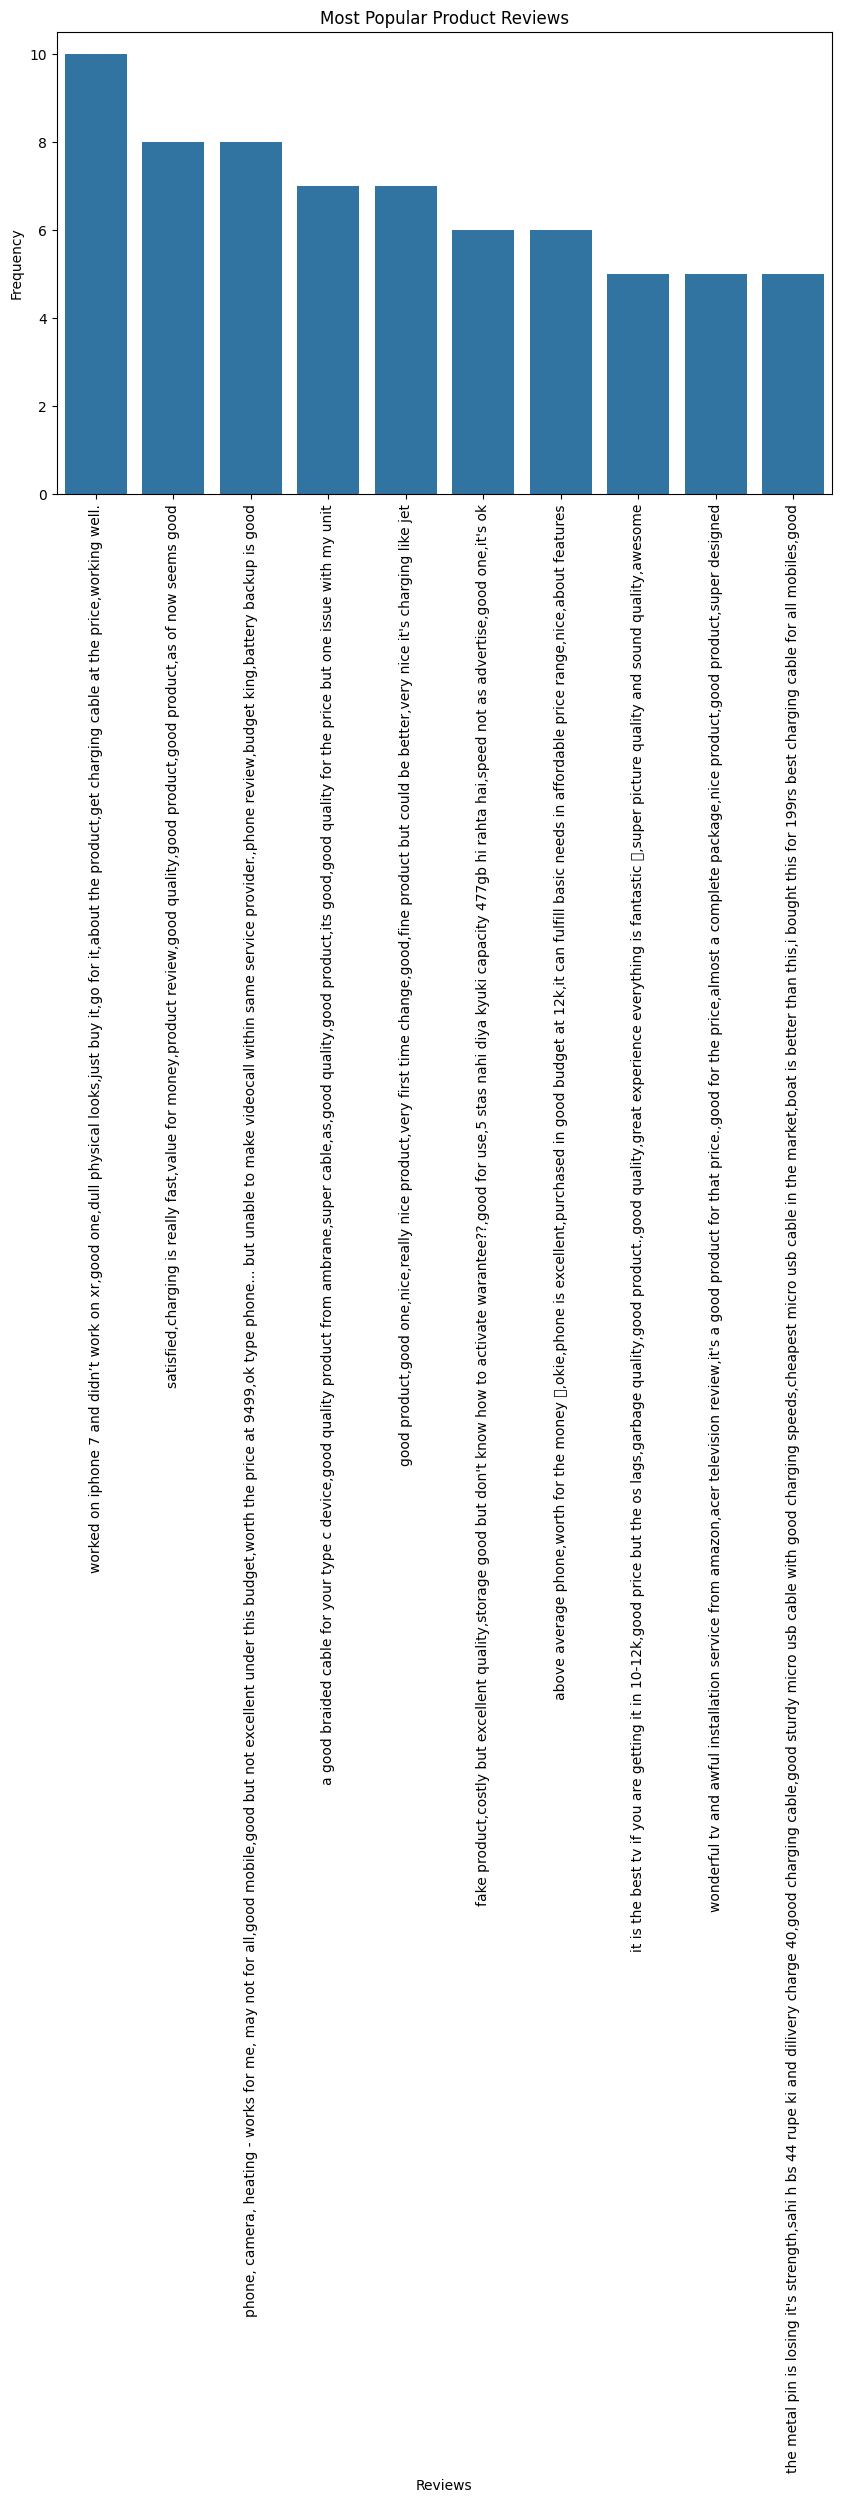

Most popular product reviews:
worked on iphone 7 and didn’t work on xr,good one,dull physical looks,just buy it,go for it,about the product,get charging cable at the price,working well.: 10
satisfied,charging is really fast,value for money,product review,good quality,good product,good product,as of now seems good: 8
phone, camera, heating - works for me, may not for all,good mobile,good but not excellent under this budget,worth the price at 9499,ok type phone... but unable to make videocall within same service provider.,phone review,budget king,battery backup is good: 8
a good braided cable for your type c device,good quality product from ambrane,super cable,as,good quality,good product,its good,good quality for the price but one issue with my unit: 7
good product,good one,nice,really nice product,very first time change,good,fine product but could be better,very nice it's charging like jet: 7
fake product,costly but excellent quality,storage good but don't know how to activate warantee

In [98]:
all_reviews = []
for review in df['review_title'].dropna():
    all_reviews.append(review.lower())

review_counts = Counter(all_reviews)

most_common_reviews = review_counts.most_common(10)

reviews, counts = zip(*most_common_reviews)
plt.figure(figsize=(10, 6))
sns.barplot(x=reviews, y=counts)
plt.title('Most Popular Product Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Most popular product reviews:")
for review, count in most_common_reviews:
    print(f"{review}: {count}")

8. What is the correlation between discounted_price and rating

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [100]:
correlation = df['discounted_price'].corr(df['rating'])

print(f"The correlation between discounted_price and rating is: {correlation}")


The correlation between discounted_price and rating is: 0.12033741712288552


9. What are the Top 5 categories based on the highest ratings

In [101]:

top_5_categories = avg_rating.head(5)
top_5_categories


,rating
main_category,
officeproducts,4.309677
toys&games,4.300000
homeimprovement,4.250000
computers&accessories,4.154967
electronics,4.081749


10. Identify any potential areas for improvement or optimization based on the data analysis

In [36]:
# Data Cleaning and Preprocessing:
# - More robust handling of missing values: Investigate the reasons behind missing data (e.g., 'category', 'rating', 'about_product')
#   and consider imputation strategies instead of dropping rows. Imputation methods could include filling with mean/median/mode or using
#   more sophisticated techniques like K-Nearest Neighbors (KNN) or regression-based imputation.
# - Deeper cleaning of 'category': The current splitting by "|" assumes a consistent format.
#   Handle variations or inconsistent delimiters more gracefully.
# - Consistent data types: The script does a lot of type conversion. Add checks for unexpected formats early in the pipeline to avoid
#   errors later.  Consider using a more general method for handling price strings, rather than directly removing characters.

# Feature Engineering:
# - Create new features from existing data: For example, calculate the discount amount ('actual_price' - 'discounted_price')
#   and analyze its relationship with other variables.  Consider creating a 'price_ratio' column (actual/discount) to assess discount magnitude.
# - Analyze text data more deeply:  For 'about_product' and 'review_title' use techniques beyond simple word counting. Consider TF-IDF, sentiment analysis,
#   and topic modeling to extract more meaningful insights. Sentiment analysis will tell you if reviews are positive, negative or neutral.

# Analysis and Visualization:
# - More detailed category analysis:  Explore subcategories within the 'main_category' to get a more granular understanding.  Consider hierarchical plots.
# - Correlation analysis: Expand beyond simple correlation coefficients.  Use scatterplots to visualize relationships between numerical variables
#   and consider techniques like Spearman rank correlation for non-linear relationships.



# EDA 4

In [102]:
df2=pd.read_csv('spotify.csv')

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [104]:
df2.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [105]:
df2.Artist.unique()

array(['Drake', 'Travis Scott', 'Post Malone', 'Noah Kahan',
       'Nicki Minaj', 'Justin Bieber', 'Jessie J', 'KAROL G', '21 Savage',
       'Metro Boomin', 'SZA', 'Jack Harlow', 'Jung Kook', 'Lil Nas X',
       'Lyrical Lemonade', 'Future', 'Don Toliver', 'Lil Wayne', 'Yeat',
       'Eminem', 'Kendrick Lamar', 'Baby Keem', 'The Weeknd', 'JAY-Z',
       'Cardi B', 'Bruno Mars', 'Ed Sheeran', 'GloRilla', 'Gunna',
       'Lil Baby', 'Internet Money', 'Sarz', 'J. Cole', 'Lil Durk',
       'cassö', 'D-Block Europe', 'Clavish', 'Latto', 'Young Nudy',
       'Megan Thee Stallion', 'NEIKED', 'Snoop Dogg', 'Dr. Dre',
       'benny blanco', 'Young Thug', 'Chris Brown', 'Dave', 'Central Cee',
       'The Kid LAROI', 'Quevedo', 'Bizarrap', 'Anuel AA', 'SAIKO',
       'David Guetta', 'Coi Leray', 'Pressa', 'Fivio Foreign', 'RAYE',
       'French Montana', 'Arizona Zervas', 'Pharrell Williams',
       'XXXTENTACION', 'Kane Brown', 'Ellie Goulding', 'Reneé Rapp',
       'Maroon 5', 'DJ Snake', 'Qu

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [106]:
print(df2.isnull().sum())

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [107]:
print(df2.duplicated().sum())

27


In [108]:
df2.drop_duplicates(inplace=True)

In [109]:
print(df2.duplicated().sum())

0


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram


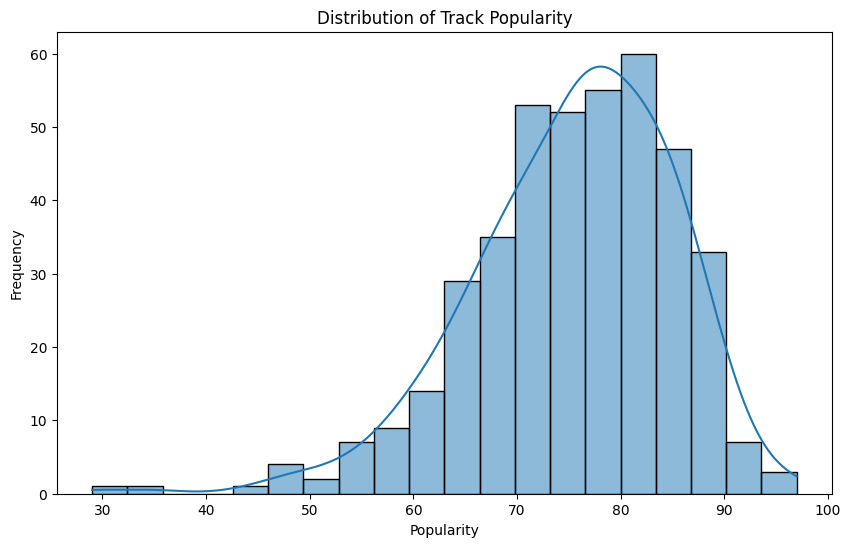

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


3.  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

In [111]:
df2.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

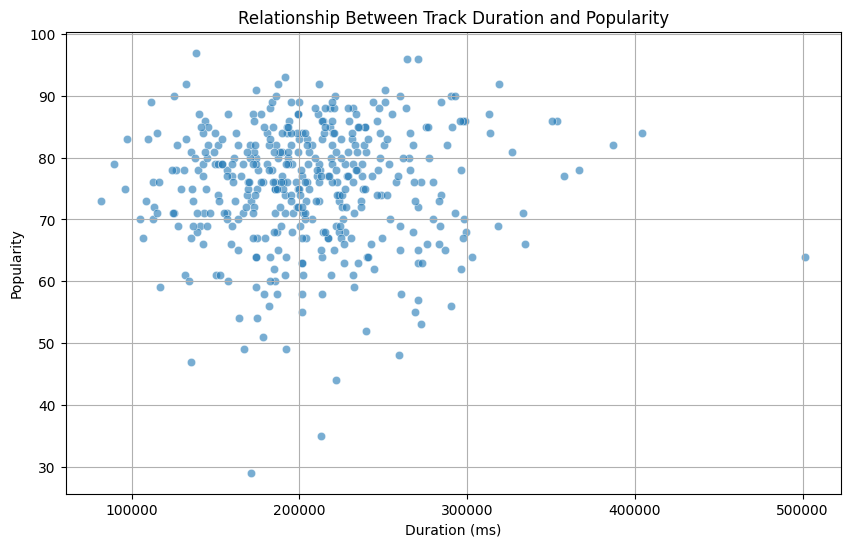

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df2, alpha=0.6)

plt.title('Relationship Between Track Duration and Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

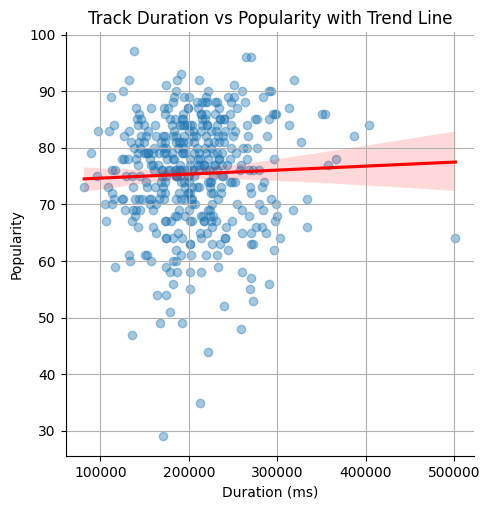

In [113]:
sns.lmplot(x='Duration (ms)', y='Popularity', data=df2, scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
plt.title('Track Duration vs Popularity with Trend Line')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()


4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot

In [114]:
df2.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

Artist
Drake              17
Eminem             11
21 Savage          10
Flo Rida           10
JAY-Z              10
                   ..
That Mexican OT     1
Young Nudy          1
XXXTENTACION        1
benny blanco        1
cassö               1
Name: Track Name, Length: 115, dtype: int64


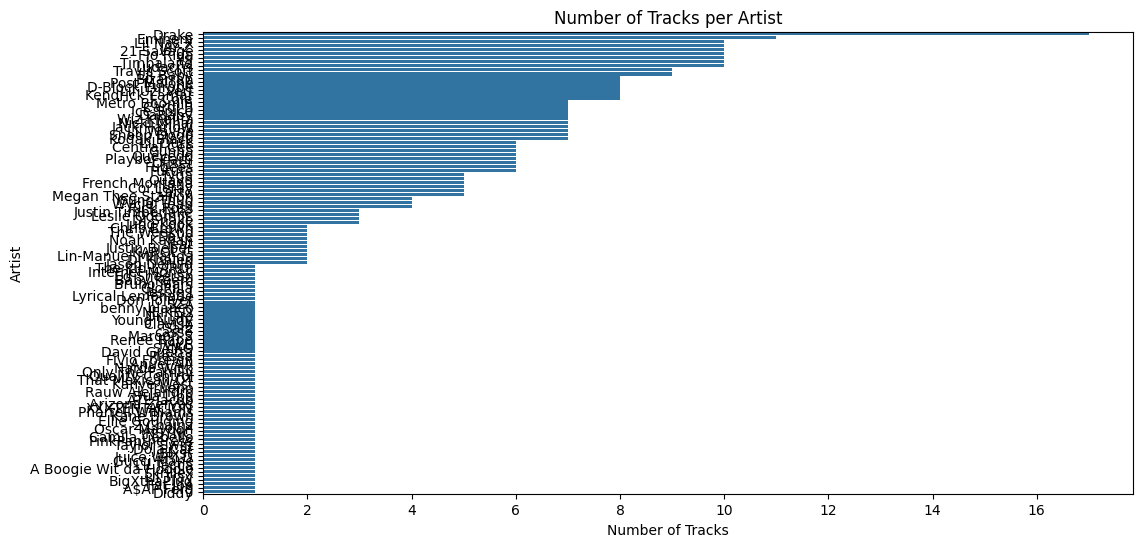

In [115]:
artist_track_counts = df2.groupby('Artist')['Track Name'].count().sort_values(ascending=False)

print(artist_track_counts)

plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=df2, order=df2['Artist'].value_counts().index) # Order by counts
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()


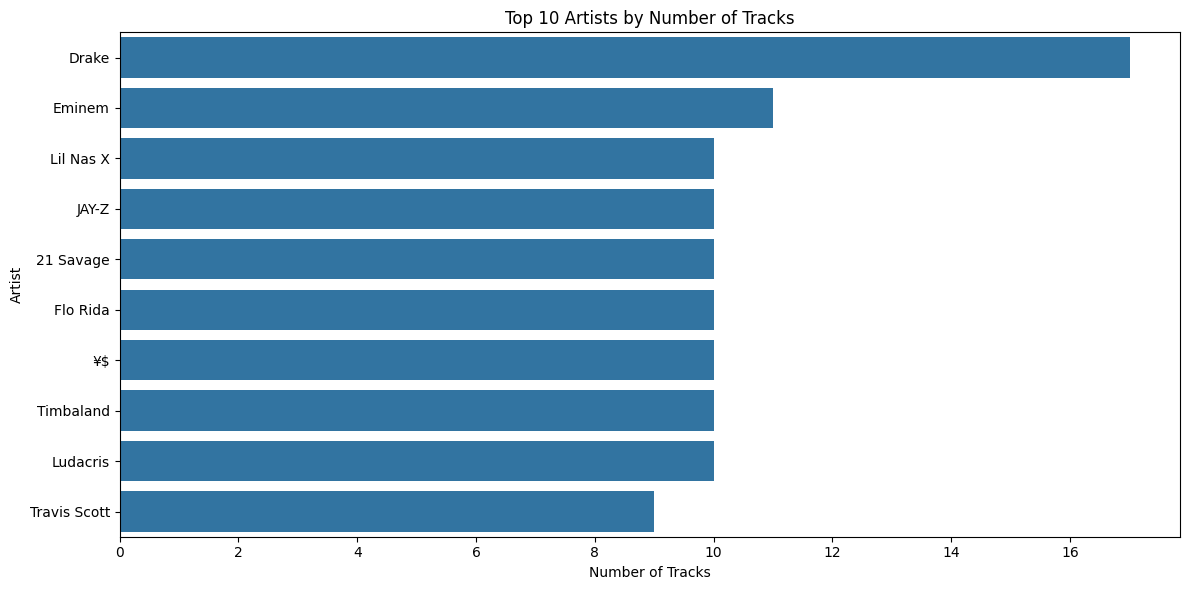

In [116]:
artist_counts = df2['Artist'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=df2, order=artist_counts.index[:10])

plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [117]:
least_popular_tracks = df2.sort_values('Popularity').head(5)

print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

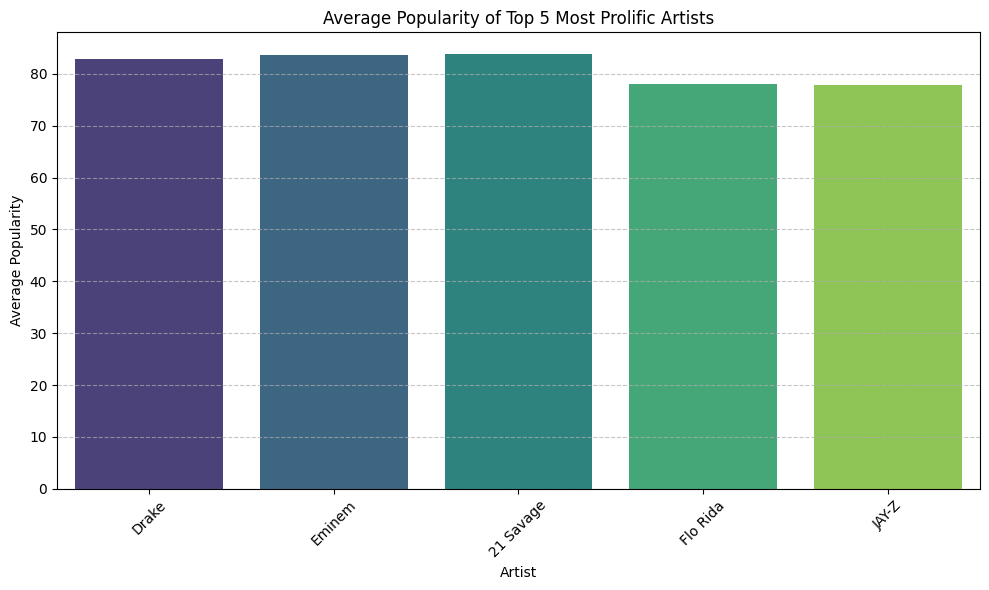

           Track Count  Average Popularity
Artist                                    
Drake               17           82.882353
Eminem              11           83.636364
21 Savage           10           83.800000
Flo Rida            10           78.000000
JAY-Z               10           77.900000


In [118]:
artist_stats = df2.groupby('Artist').agg({
    'Track Name': 'count',
    'Popularity': 'mean'
}).rename(columns={'Track Name': 'Track Count', 'Popularity': 'Average Popularity'})

top_5_artists = artist_stats.sort_values(by='Track Count', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_artists.index, y=top_5_artists['Average Popularity'], palette='viridis')
plt.title("Average Popularity of Top 5 Most Prolific Artists")
plt.ylabel("Average Popularity")
plt.xlabel("Artist")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(top_5_artists)

In [119]:
most_popular_artist = top_5_artists['Average Popularity'].idxmax()
highest_avg_popularity = top_5_artists['Average Popularity'].max()

print(f"\nArtist with the highest average popularity among top 5: {most_popular_artist}")
print(f"Highest average popularity: {highest_avg_popularity}")



Artist with the highest average popularity among top 5: 21 Savage
Highest average popularity: 83.8


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [120]:
artist_track_counts = df2.groupby('Artist').size().sort_values(ascending=False)

top_5_artists = artist_track_counts.head(5).index.tolist()

top_5_df = df2[df2['Artist'].isin(top_5_artists)]

most_popular_tracks = top_5_df.loc[top_5_df.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]

print("Most Popular Track for Each of the Top 5 Artists:\n")
print(most_popular_tracks)


Most Popular Track for Each of the Top 5 Artists:

        Artist                               Track Name  Popularity
70   21 Savage                                   redrum          96
0        Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
80      Eminem                               Without Me          90
300   Flo Rida                       Low (feat. T-Pain)          84
100      JAY-Z                          Ni**as In Paris          86


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

In [121]:
df2.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

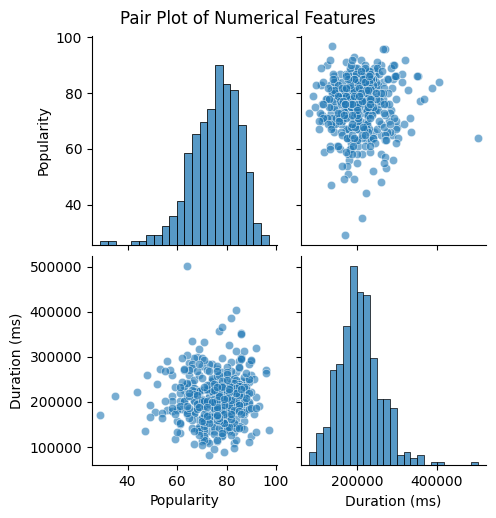

In [122]:
numeric_cols = ['Popularity', 'Duration (ms)']

sns.pairplot(df2[numeric_cols], kind='scatter', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot

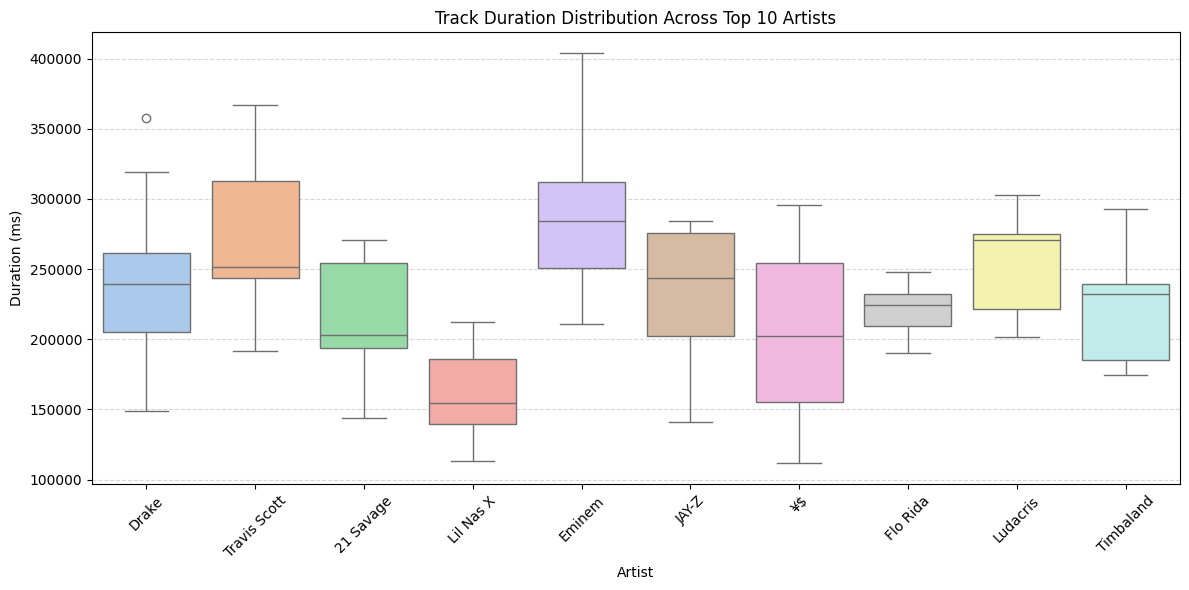

In [123]:
top_artists = df2['Artist'].value_counts().head(10).index

filtered_df = df2[df2['Artist'].isin(top_artists)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=filtered_df, palette='pastel')
plt.xticks(rotation=45)
plt.title("Track Duration Distribution Across Top 10 Artists")
plt.ylabel("Duration (ms)")
plt.xlabel("Artist")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


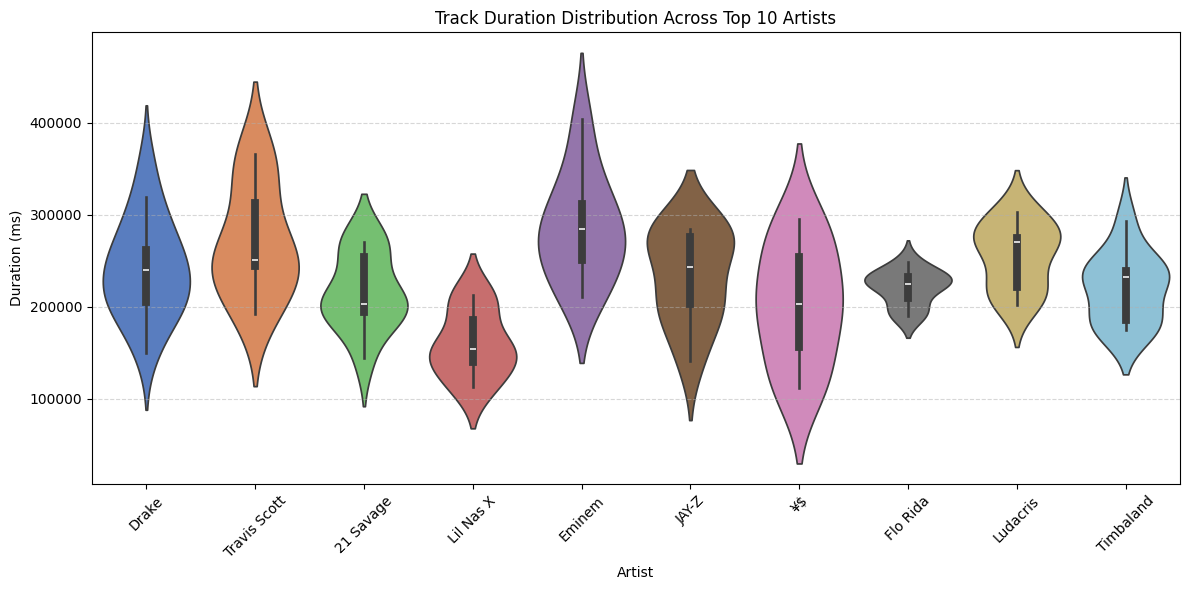

In [124]:
top_artists = df2['Artist'].value_counts().head(10).index

filtered_df = df2[df2['Artist'].isin(top_artists)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=filtered_df, palette='muted')
plt.xticks(rotation=45)
plt.title("Track Duration Distribution Across Top 10 Artists")
plt.ylabel("Duration (ms)")
plt.xlabel("Artist")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

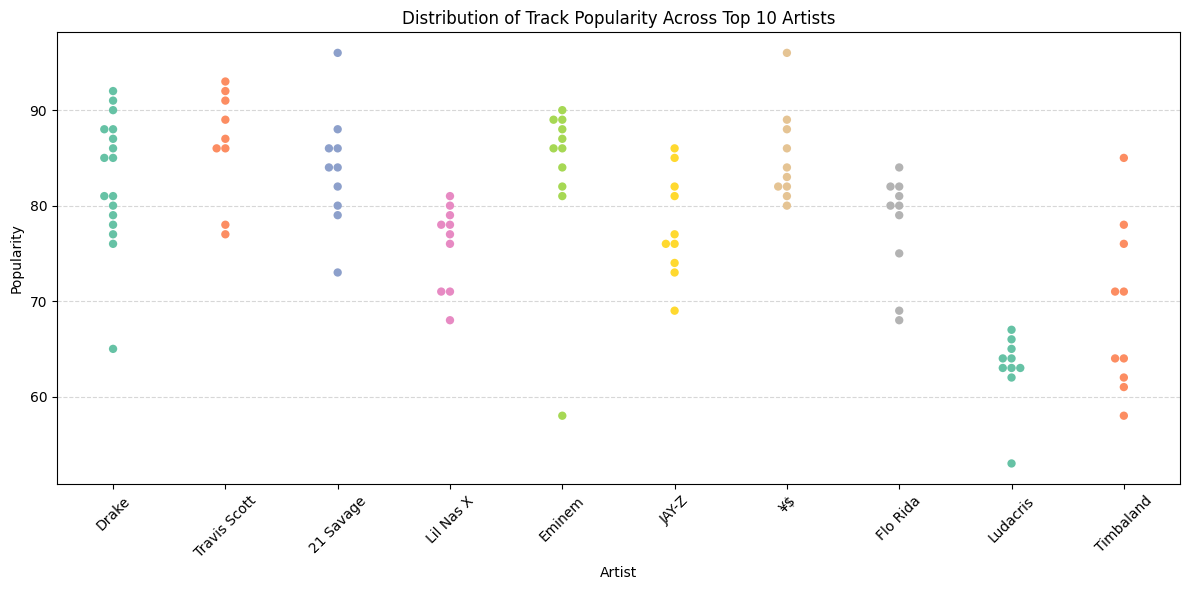

In [125]:
top_artists = df2['Artist'].value_counts().head(10).index

filtered_df = df2[df2['Artist'].isin(top_artists)]
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Artist', y='Popularity', data=filtered_df, palette='Set2', size=6)
plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity Across Top 10 Artists")
plt.ylabel("Popularity")
plt.xlabel("Artist")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-61-09324ea35930>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity', data=filtered_df, palette='muted')


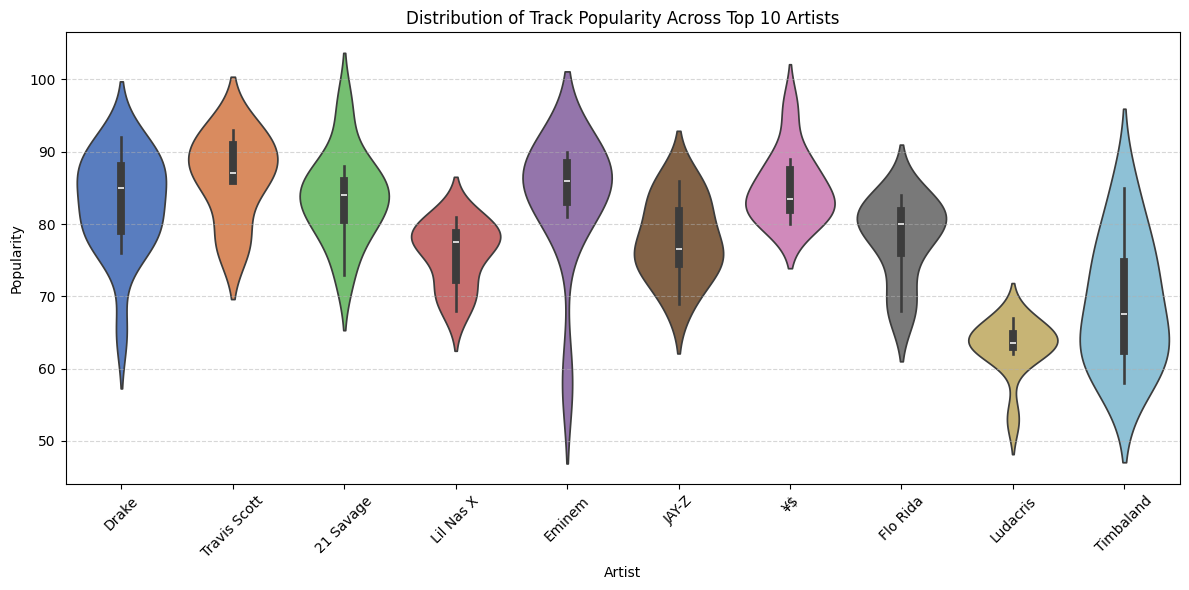

In [61]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=filtered_df, palette='muted')
plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity Across Top 10 Artists")
plt.ylabel("Popularity")
plt.xlabel("Artist")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()